In [407]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [408]:
#Load the data and rename variables
df = pd.read_csv("Data/aggregated_adm2.csv")
df = pd.DataFrame(df)
df = df.rename(columns = {'JAXA_GPM_L3_GSMaP_v6_operational_hourlyPrecipRate':"perc_operational",
 'JAXA_GPM_L3_GSMaP_v6_reanalysis_hourlyPrecipRate':'perc_real',
 'MODIS_006_MOD11A1_LST_Day_1km':"ls_temp_day",
 'MODIS_006_MOD11A1_LST_Night_1km' : "ls_temp_night",
 'MODIS_006_MYD13A1_EVI' : "evi",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Qair_f_tavg': "humid",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Tair_f_tavg': "ns_temp",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Wind_f_tavg': "wind_speed",
                         'adm_level':'adm_level','date':'date' })
adm = df.adm_level.unique() #list of administrative regions
var_names = df.columns #list variable names
dates = df.date.unique()
df.head()

,adm_level,date,perc_operational,perc_real,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
0,Abra,2012-01-01,NaN,1.033367,14984.804979,14616.278838,4151.471745,0.012766,294.774562,4.659326
1,Abra,2012-02-01,NaN,58.082871,15066.672199,14643.203320,4172.497206,0.012791,295.165246,4.439152
2,Abra,2012-03-01,NaN,38.749088,15176.486307,14693.641494,3990.242186,0.012960,296.236624,3.880467
3,Abra,2012-04-01,NaN,104.277516,15145.847303,14703.742739,4524.423929,0.014471,297.701705,2.417304
4,Abra,2012-05-01,NaN,303.986075,15085.274689,11559.468880,4083.454357,0.015655,298.016335,2.415639


In [482]:
print(dates.shape)

(96,)


In [409]:
#Basic infor
print("Data has the following shape:", df.shape)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

Data has the following shape: (8352, 10)


,perc_operational,perc_real,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
count,6020.000000,2236.000000,8352.000000,8352.000000,8352.000000,8170.000000,8170.000000,8170.000000
mean,215.158272,232.200765,14109.095149,12615.536860,4357.669156,0.015859,288.816501,4.459012
std,226.100461,249.169969,1606.362676,3659.722250,831.379999,0.001796,23.378574,1.521765
min,0.000000,0.000000,0.000000,0.000000,580.256039,0.008842,170.808245,1.311007
25%,54.562383,76.519707,13912.080415,12834.190226,4025.835650,0.015051,291.465017,3.305328
50%,162.736301,179.753296,14610.732718,14310.306393,4485.461634,0.016174,297.468516,4.220587
75%,299.321445,313.694337,14910.440422,14548.876898,4886.700098,0.017088,299.076154,5.436826
max,2552.602344,3849.567223,15789.342553,15037.531915,6451.118615,0.019997,303.114502,12.215397


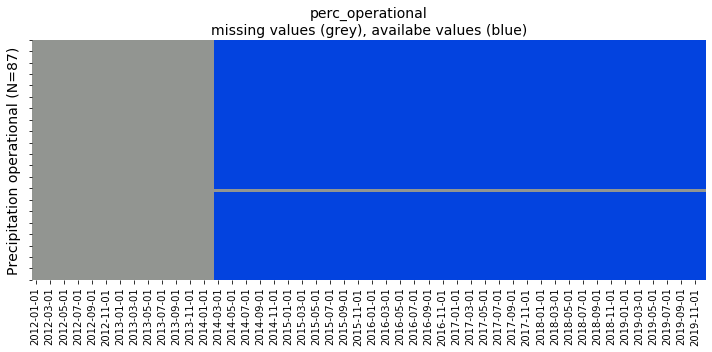

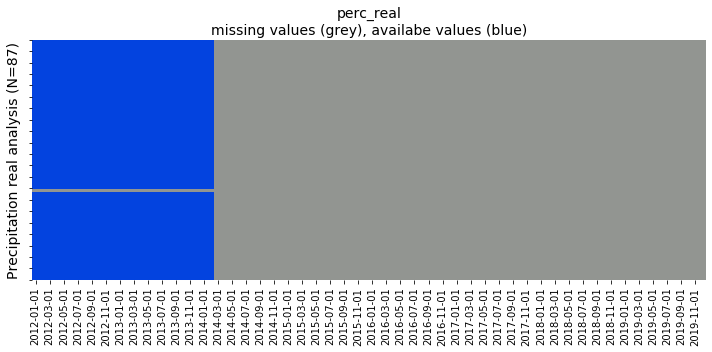

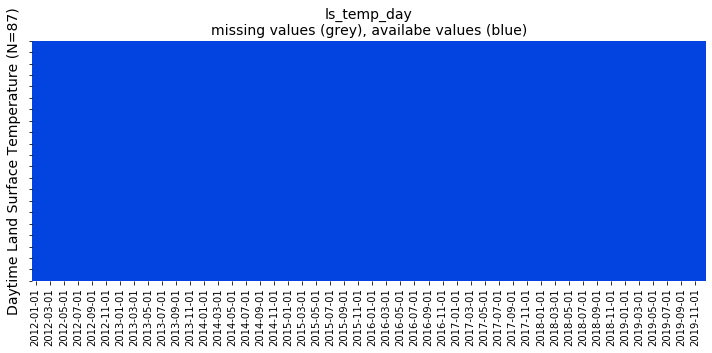

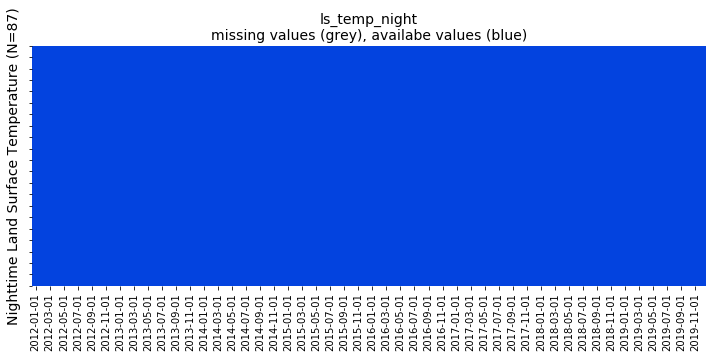

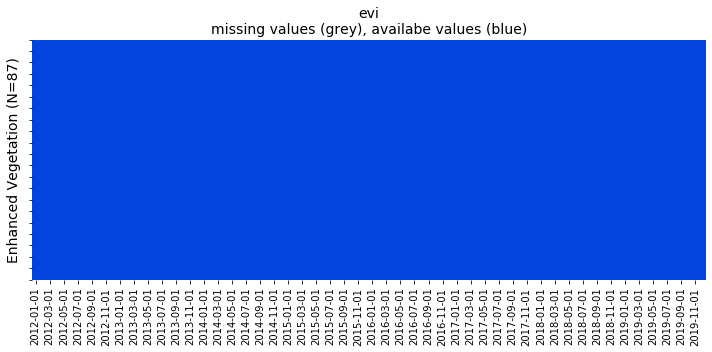

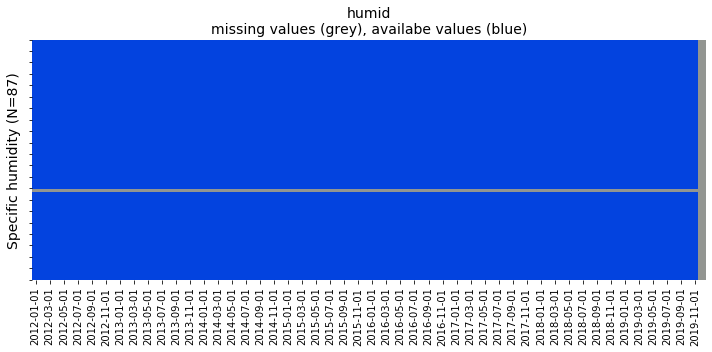

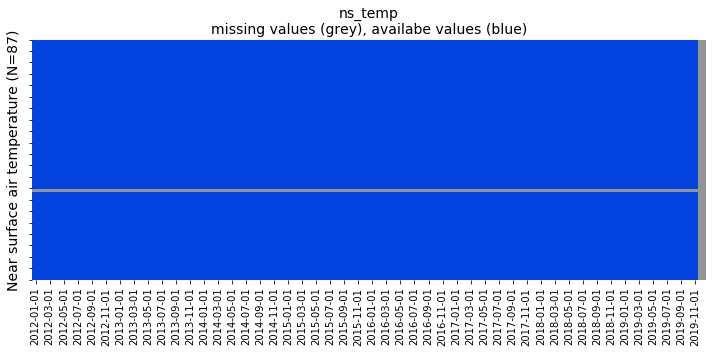

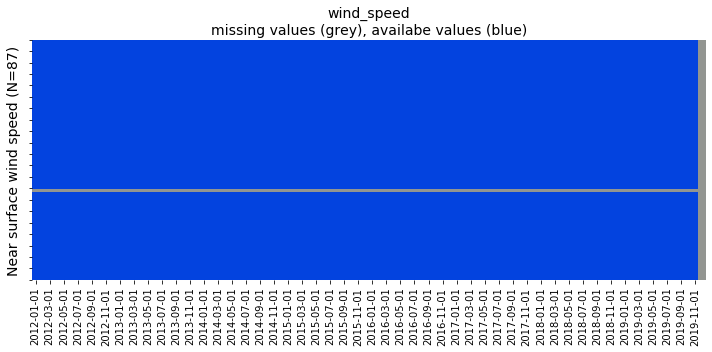

In [410]:
#Visualize missing values - code was found on the Internet
def missing_values_graph(frame, obs, time, var, Yname):
    test = frame[[obs, time, var]]
    test[var].fillna(-1, inplace=True)
    test = test.groupby([obs, time])[var].aggregate('mean').unstack()
    test[test > 0] = 1
    cmap = sns.xkcd_palette(["grey", "blue"])
    plt.figure(figsize=(10, 5))
    ax = sns.heatmap(test, center=0, cmap=cmap, cbar=False,
                     cbar_kws={'ticks': [-1, 0, 1]})
    ax.set(yticklabels=[])
    plt.ylabel(Yname+ " (N=" + str(len(test)) + ")", fontsize=14)
    plt.xlabel("")
    plt.title((var + "\nmissing values (grey), availabe values (blue)"),
              fontsize=14)
    plt.tight_layout()
    plt.show()

    
    
missing_values_graph(df, "adm_level", "date", "perc_operational", "Precipitation operational")
#missing from 2012-01-01 until 2014-03-01; missing for "NCR, City of Manila, First District"

missing_values_graph(df, "adm_level", "date", "perc_real", "Precipitation real analysis")
#missing from 2014-03-01 until 2019-12-01; missing for "NCR, City of Manila, First District"
missing_values_graph(df, "adm_level", "date", "ls_temp_day", "Daytime Land Surface Temperature")
missing_values_graph(df, "adm_level", "date", "ls_temp_night", "Nighttime Land Surface Temperature")
missing_values_graph(df, "adm_level", "date", "evi", "Enhanced Vegetation")
missing_values_graph(df, "adm_level", "date", "humid", "Specific humidity")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01 
missing_values_graph(df, "adm_level", "date", "ns_temp", "Near surface air temperature")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01
missing_values_graph(df, "adm_level", "date", "wind_speed", "Near surface wind speed")
#missing for "NCR, City of Manila, First District"; missing from 2019-11-01


In [411]:
#create new Hierarchical Indexes
df.set_index(['date', 'adm_level'], inplace=True)
df = df.swaplevel(i='adm_level', j='date')
df.sort_index(inplace = True)

In [412]:
df_temp = df.drop(columns = ["ls_temp_day", "ls_temp_night", "evi"])
df_temp.head()

perc_operational   perc_real     humid     ns_temp  \
adm_level date                                                             
Abra      2012-01-01               NaN    1.033367  0.012766  294.774562   
          2012-02-01               NaN   58.082871  0.012791  295.165246   
          2012-03-01               NaN   38.749088  0.012960  296.236624   
          2012-04-01               NaN  104.277516  0.014471  297.701705   
          2012-05-01               NaN  303.986075  0.015655  298.016335   

                      wind_speed  
adm_level date                    
Abra      2012-01-01    4.659326  
          2012-02-01    4.439152  
          2012-03-01    3.880467  
          2012-04-01    2.417304  
          2012-05-01    2.415639

In [413]:
for administration in adm:
    if df_temp.loc[administration, :].isnull().all().all():
        print(administration)

df_temp.loc["NCR, City of Manila, First District",:]

NCR, City of Manila, First District


,perc_operational,perc_real,humid,ns_temp,wind_speed
date,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN
2012-02-01,NaN,NaN,NaN,NaN,NaN
2012-03-01,NaN,NaN,NaN,NaN,NaN
2012-04-01,NaN,NaN,NaN,NaN,NaN
2012-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-08-01,NaN,NaN,NaN,NaN,NaN
2019-09-01,NaN,NaN,NaN,NaN,NaN
2019-10-01,NaN,NaN,NaN,NaN,NaN


In [414]:
df.reset_index(inplace=True)
df.head()

,adm_level,date,perc_operational,perc_real,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
0,Abra,2012-01-01,NaN,1.033367,14984.804979,14616.278838,4151.471745,0.012766,294.774562,4.659326
1,Abra,2012-02-01,NaN,58.082871,15066.672199,14643.203320,4172.497206,0.012791,295.165246,4.439152
2,Abra,2012-03-01,NaN,38.749088,15176.486307,14693.641494,3990.242186,0.012960,296.236624,3.880467
3,Abra,2012-04-01,NaN,104.277516,15145.847303,14703.742739,4524.423929,0.014471,297.701705,2.417304
4,Abra,2012-05-01,NaN,303.986075,15085.274689,11559.468880,4083.454357,0.015655,298.016335,2.415639


ls_temp_day


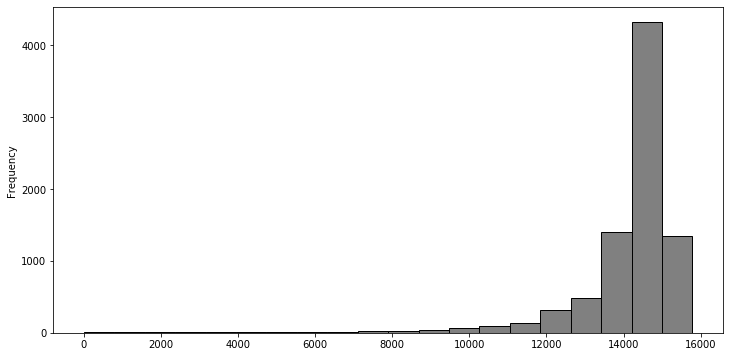

ls_temp_night


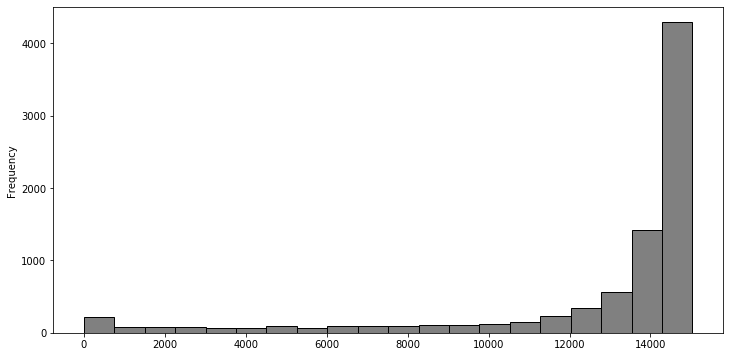

evi


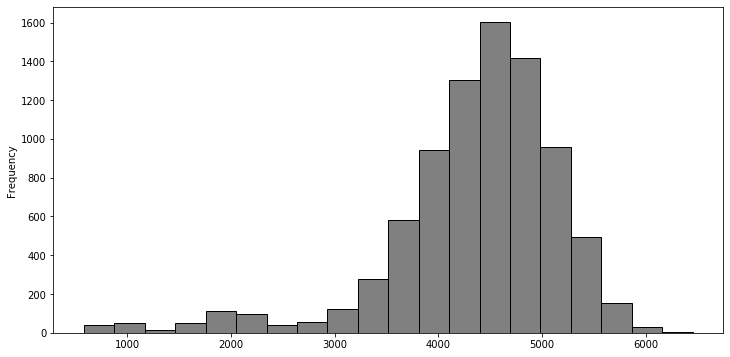

humid


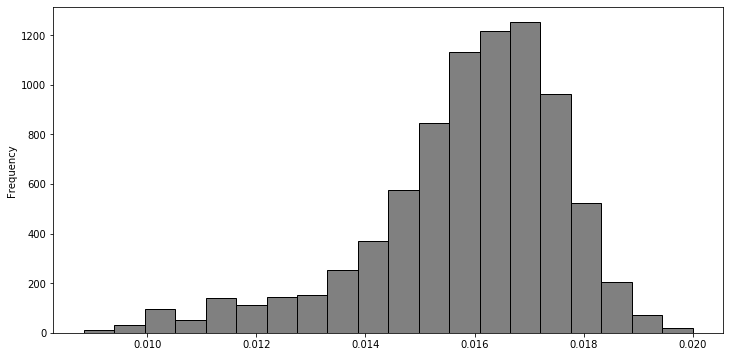

ns_temp


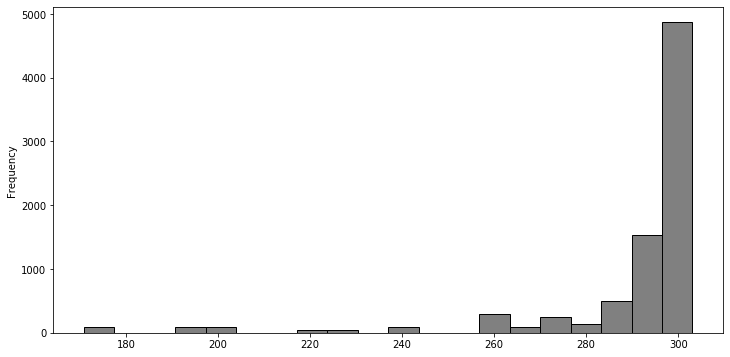

wind_speed


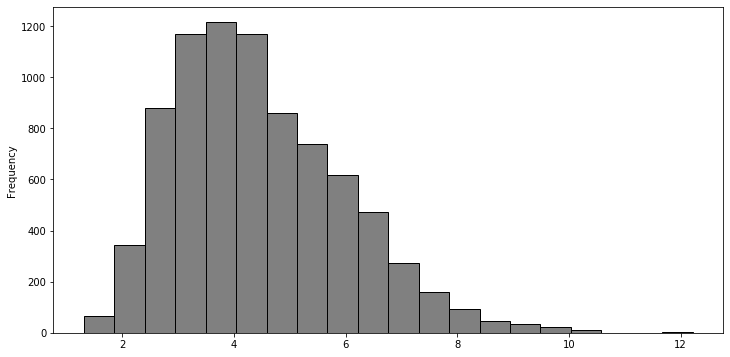

In [424]:
#Check normality of the data


for variable in var_names[4:11]:
    print(variable)
    df[variable].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()
    
    

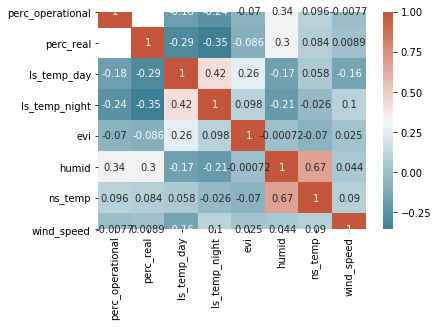

In [416]:
#Check correlations
corr = df.iloc[:,1:11].corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

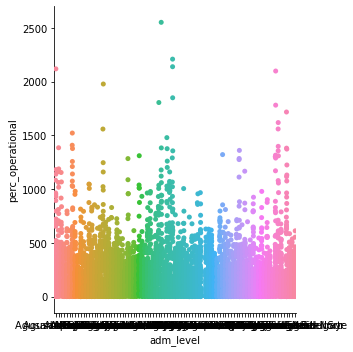

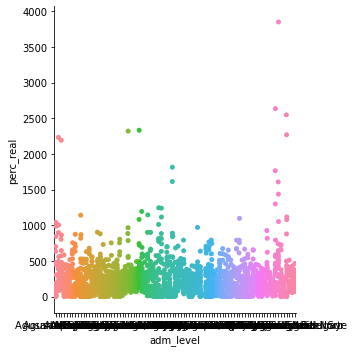

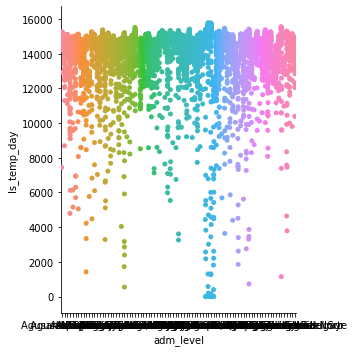

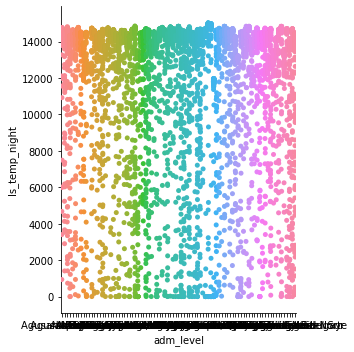

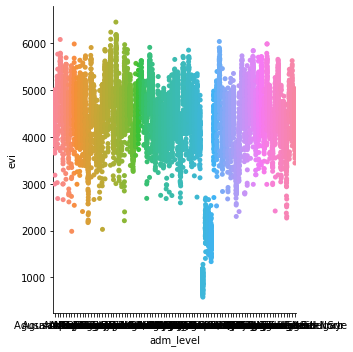

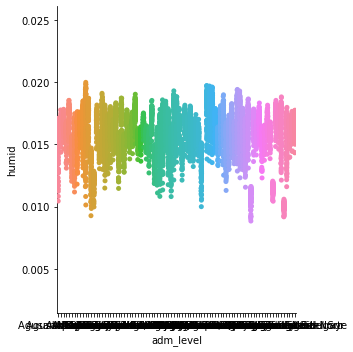

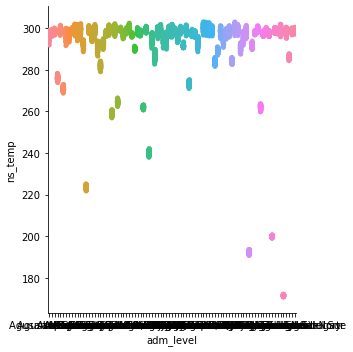

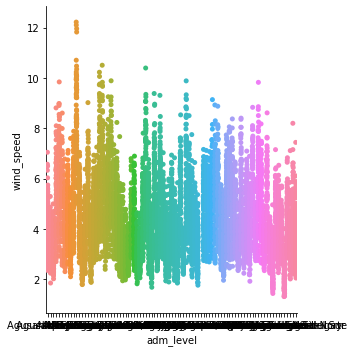

In [417]:
#Categorical scatter plots for the variables per adm level
# kind="box" - to get boxplots
# kind="violin" - to get violin plots
# data=df.sort_values("var_name") to sort
sns.catplot(x="adm_level", y='perc_operational', data = df);
sns.catplot(x="adm_level", y='perc_real', data=df);
sns.catplot(x="adm_level", y='ls_temp_day', data=df);
sns.catplot(x="adm_level", y='ls_temp_night', data=df);
sns.catplot(x="adm_level", y='evi', data=df);
sns.catplot(x="adm_level", y='humid', data=df);
sns.catplot(x="adm_level", y='ns_temp', data=df);
sns.catplot(x="adm_level", y='wind_speed', data=df);

In [418]:
mean_by_dates = df.groupby(['date']).mean()
mean_by_dates.reset_index(inplace=True)
print(mean_by_dates.head())

         date  perc_operational   perc_real   ls_temp_day  ls_temp_night  \
0  2012-01-01               NaN  188.106647  14049.675940   14151.791609   
1  2012-02-01               NaN  287.459227  14281.508496   13031.339065   
2  2012-03-01               NaN  144.824030  14327.196389   12915.227606   
3  2012-04-01               NaN  107.301074  14592.357075   14372.838733   
4  2012-05-01               NaN  206.723202  14143.320806   11498.131435   

           evi     humid     ns_temp  wind_speed  
0  4254.555980  0.015401  287.752810    5.291494  
1  4344.078659  0.015277  287.699094    5.218101  
2  4266.758495  0.015190  288.120927    5.279480  
3  4510.812286  0.015770  289.183325    3.761510  
4  4456.928057  0.016376  289.789677    2.690273  


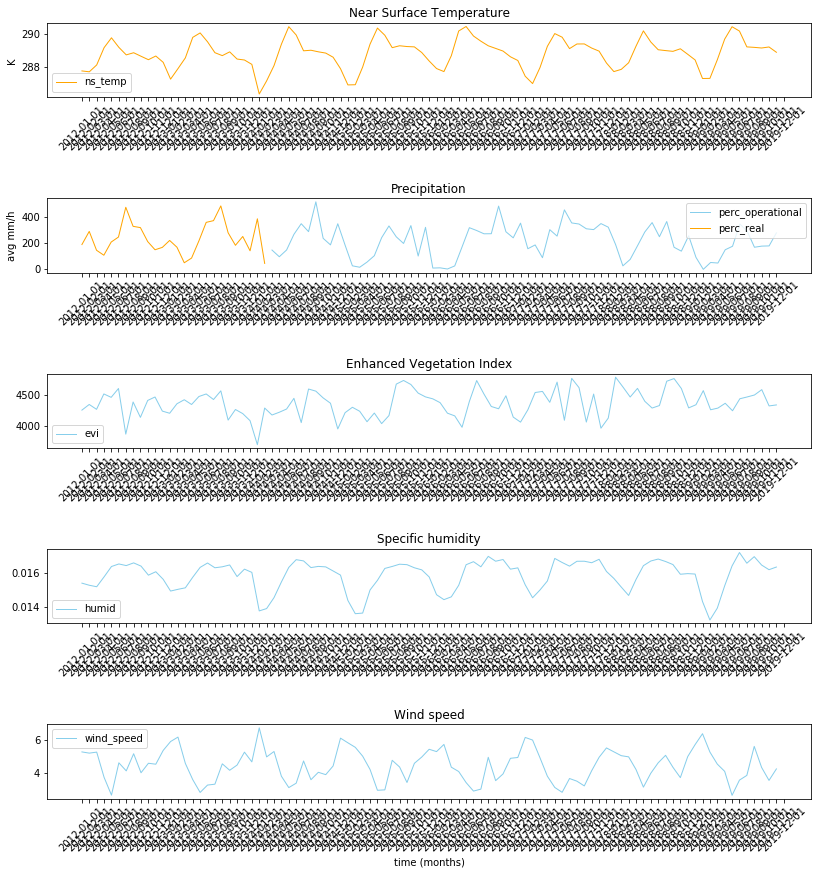

In [419]:
#Check seasonality

plt.figure(
    figsize=(12, 15))

plt.subplot(6, 1, 1)
plt.plot( 'date', 'ls_temp_day', data=mean_by_dates,color='skyblue', linewidth=1)
plt.plot( 'date', 'ls_temp_night', data=mean_by_dates, color='orange', linewidth=1)
plt.xticks(rotation=45)
ax = plt.axes()
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.ylabel('K')
plt.title("Land Surface Temperature during day and night")

plt.subplot(6, 1, 2)
plt.plot( 'date', 'ns_temp', data=mean_by_dates, color='orange', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('K')
plt.title("Near Surface Temperature")

plt.subplot(6, 1, 3)
plt.plot( 'date', 'perc_operational', data=mean_by_dates, markersize=1, color='skyblue', linewidth=1)
plt.plot( 'date', 'perc_real', data=mean_by_dates, color='orange', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('avg mm/h')
plt.title("Precipitation")

plt.subplot(6, 1, 4)
plt.plot( 'date', 'evi', data=mean_by_dates, markersize=1, color='skyblue', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.title("Enhanced Vegetation Index")

plt.subplot(6, 1, 5)
plt.plot( 'date', 'humid', data=mean_by_dates, markersize=1, color='skyblue', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.title("Specific humidity")

plt.subplot(6, 1, 6)
plt.plot( 'date', 'wind_speed', data=mean_by_dates, markersize=1, color='skyblue', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('time (months)')
plt.title("Wind speed")

plt.tight_layout(pad=3.0)
plt.show() 


          months  perc_operational   perc_real   ls_temp_day  ls_temp_night  \
0    1 - January        190.908954  263.264855  13914.986235   13326.094859   
1   10 - October        282.725497  196.335171  14090.729511   12967.895229   
2  11 - November        198.074731  198.827935  14256.786296   14001.493730   
3  12 - December        296.618758  153.716908  14153.648327   14024.249506   
4   2 - Feburary         76.938290  166.886774  14459.263330   14022.080201   

           evi     humid     ns_temp  wind_speed  
0  4168.080799  0.014816  287.319096    5.867849  
1  4431.939127  0.016226  288.935566    4.136096  
2  4432.189342  0.016238  288.730373    4.801412  
3  4185.445331  0.015944  288.250794    5.409144  
4  4407.320465  0.014404  287.433351    5.506980  


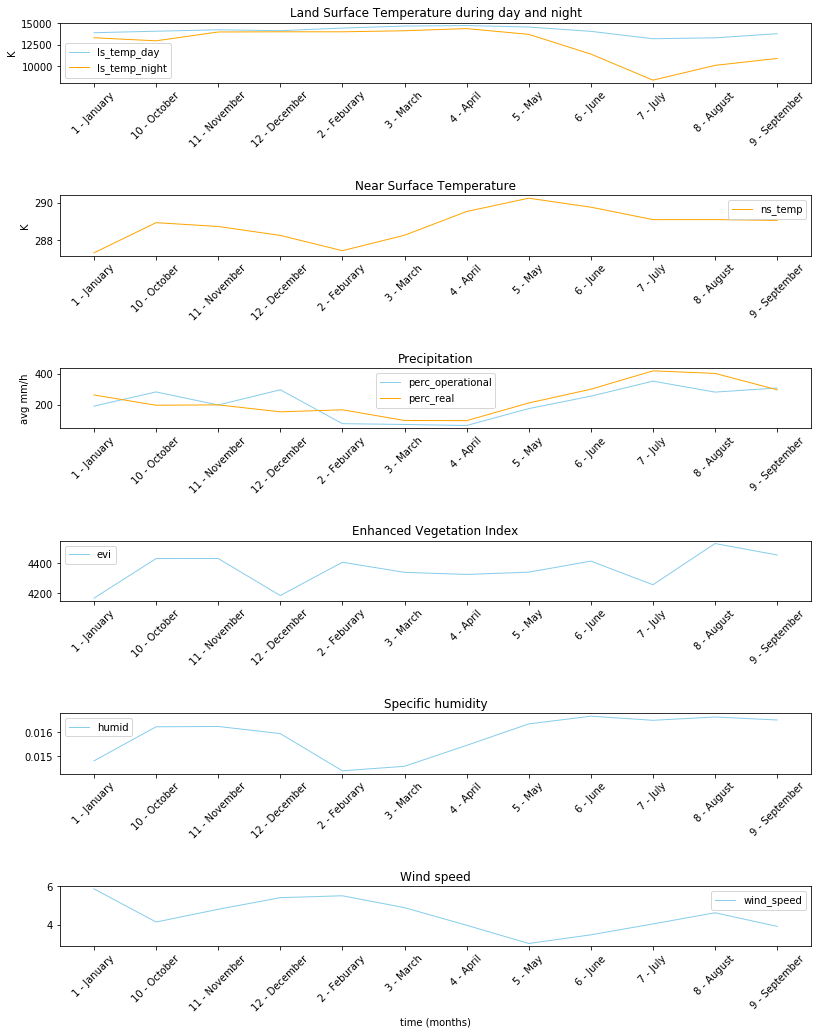

In [479]:
#get monthly data
month_lst = ['1 - January', '2 - Feburary', '3 - March', '4 - April', '5 - May', '6 - June', '7 - July', 
              '8 - August', '9 - September', '10 - October', '11 - November', '12 - December']
months = pd.DataFrame(np.empty(8352), columns = list("m"))
for i in list(range(1,13)):
    if i<10:
        string = "-0"+str(i)+"-"
        months[df['date'].str.contains(string)] = month_lst[i-1]
    else:
        string = "-"+str(i)+"-"
        months[df['date'].str.contains(string)] = month_lst[i-1]
        
df_monthly = df
df_monthly["months"] = months

#get monthly means
mean_by_month = df_monthly.groupby(['months']).mean()
mean_by_month.reset_index(inplace=True)
print(mean_by_month.head())

#plot monthly means
plt.figure(
    figsize=(12, 15))

plt.subplot(6, 1, 1)
plt.plot( 'months', 'ls_temp_day', data=mean_by_month, color='skyblue', linewidth=1)
plt.plot( 'months', 'ls_temp_night', data=mean_by_month, color='orange', linewidth=1)
plt.xticks(rotation=45)
plt.legend()
plt.ylabel('K')
plt.title("Land Surface Temperature during day and night") #DOESN'T WORK

plt.subplot(6, 1, 2)
plt.plot( 'months', 'ns_temp', data=mean_by_month, color='orange', linewidth=1)
plt.legend()
plt.xticks(rotation=45) 
plt.ylabel('K')
plt.title("Near Surface Temperature")

plt.subplot(6, 1, 3)
plt.plot( 'months', 'perc_operational', data=mean_by_month, color='skyblue', linewidth=1)
plt.plot( 'months', 'perc_real', data=mean_by_month, color='orange', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('avg mm/h')
plt.title("Precipitation")

plt.subplot(6, 1, 4)
plt.plot( 'months', 'evi', data=mean_by_month, color='skyblue', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.title("Enhanced Vegetation Index")

plt.subplot(6, 1, 5)
plt.plot( 'months', 'humid', data=mean_by_month, markersize=1, color='skyblue', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.title("Specific humidity")

plt.subplot(6, 1, 6)
plt.plot( 'months', 'wind_speed', data=mean_by_month, markersize=1, color='skyblue', linewidth=1)
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('time (months)')
plt.title("Wind speed")

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
#Add the coordintes
#Make new features

In [ ]:
df.iloc[0]